In [ ]:
import matplotlib.pyplot as plt
from nltk.tree import Tree
import numpy as np
import re
import seaborn as sns
from transformers import AutoModel, AutoTokenizer
import torch

In [352]:
dir = "ch_copy/00/"
doc_id = '0037'

#function to get plain sentence, constituency parse and coreference-id-labeled tokens 
def get_sentence_profiles(doc_id):
    profiles = {}
    filename = "ch_" + doc_id + ".onf"
    fp = dir + filename
    with open(fp, "r") as f:
        lines = f.readlines()
    #enumerated = enumerate(lines) -- don't do this
    plain_sent_idxs = [i for i, txt in enumerate(lines) if txt == ("Plain sentence:\n")]
    treebanked_idxs = [i for i, txt in enumerate(lines) if txt.find("Treebanked sentence:\n") > -1]
    tree_idxs = [i for i, txt in enumerate(lines) if txt == ("Tree:\n")]
    leaves_idxs = [i for i, txt in enumerate(lines) if txt == ("Leaves:\n")]

    n_sents = len(plain_sent_idxs)

    for i in range(n_sents):
        profile = doc_id + "_" + str(i)
        profiles[profile] = {}
        profiles[profile]["plain"] = lines[(plain_sent_idxs[i] + 2):treebanked_idxs[i]][0].strip()
        profiles[profile]["plain"] = profiles[profile]["plain"].replace("--", "")
        raw_tree = lines[(tree_idxs[i]+2):leaves_idxs[i]]
        profiles[profile]["tree"] = process_tree(raw_tree)

        if i < n_sents - 1:
            profiles[profile]["leaves"] = lines[(leaves_idxs[i]+2):(plain_sent_idxs[i+1]-3)]
        else:
            profiles[profile]["leaves"] = lines[(leaves_idxs[i]+2):-3]

        #print(profiles[profile]["leaves"])
        profiles[profile]["leaves"] = process_leaves(profiles[profile]["leaves"])

        i += 1
    return profiles

def process_leaves(leafnotes):
    leaves_dict = {}
    i = 0
    for line in leafnotes:
        line = line.strip()
        if len(line) > 0:
            line = line.split()
            if line[0].isdigit():
                if line[1] != "--":
                    leaves_dict[i] = {"token":"", "info": []}
                    leaves_dict[i]["token"] = line[1]
                    i += 1
            elif i-1 in leaves_dict:
                leaves_dict[i-1]["info"].append(line)
       
    return leaves_dict

def process_tree(raw_tree):
    tree = ""
    for line in raw_tree:
        tree += line.strip()
    return tree

def get_doc_profile(doc_id):
    profile = {}
    sentence_profiles = get_sentence_profiles(doc_id)
    profile["plain"] = ""
    for id in sentence_profiles:
        profile["plain"] += sentence_profiles[id]["plain"]
    profile["tree"] = [sentence_profiles[profile]["tree"] for profile in sentence_profiles]
    profile["leaves"] = sentence_profiles[doc_id + "_0"]["leaves"]
    sentence_profiles_tail = dict(list(sentence_profiles.items())[1:])
    #print(sentence_profiles_tail)
    i = list(profile["leaves"].keys())[-1]
    for id in sentence_profiles_tail:
        #print(id)
        for leaf in sentence_profiles[id]['leaves']:
            i += 1
            profile["leaves"][i] = sentence_profiles_tail[id]['leaves'][leaf]
    return profile


In [353]:
doc_profile = get_doc_profile(doc_id)
doc_profile

{'plain': '就觉挺不舒服的,本来就是信心挺足的.啊.啊.后来我说小穗啊,你既然你走这一步了好,你找人算了这个哈.我说这样吧,我说我认识一个人就是起那个八卦呀.嗯哼.嗯哈.起的挺准的,他就是说,就说某一件事儿,在看人的大运哈.反正我我知道的哈,他说我和我认识这些人哈,真说得挺准的.呃哼.呃哈.呃哈.哦,是吗?我说这样吧,反正你已经,已经呃就是算过了哈.我说找你帮她看一看吧.晚上我就去找人去了.嗯哼.嗯哈.好好的给小穗算哈,让小穗哈立秋以后.哎我记得你那年走,是不是就是立秋以后?啊呵.我是八月四号到的啊,我就是明天到的,到的美国.当然那时候已经立秋了吧?从农历上讲.我不知道哎.嗯,我怎么当时有一个印-,我当时有个印象,你好象也是立秋啊,有一个立秋什么说到.就是跟她说.嗯哼.后来呢就,我就跟他说了这件事儿,把小-小穗的生辰八字给他了哈.就让他陈这一件事儿,就说近要去那个什么,问行不行.他不让她动,他让她八月八号立秋以后.嗯哈.嗯哈.嗯哈.呃哈.八月八号立秋.啊,他说哈,她立秋以后.我说能不能那个什么,他说小穗排大运排到三十二岁以前哈,有这个运的.嗯哼.哎哟,我就赶紧第二天回来告诉小穗,我说小穗,我说人家说你肯定那个能那个什么.嗯哈呵呵.我说但是呢,是有一个时间那个限制.我说整好差一星-.她本来想这个星期一嘛,去嘛.下星期能挪啵下-,下个星期一啦.下星期一正好那天立秋.是啊.嗯哈.那八月八号就是下个星期一.啊.呀.啊那,我说你这样吧.我说你拖一个星期吧.我说反正呀,嗯哈.锺监虹他妈给你算了以后你心情也不好.你去了呃.嗯呵.嗯呵.呃呵,哦.哎哟,看了锺监虹就约好了,锺监虹直接.啊,怎么现在小穗,信这个这么信啊现在.啊?不是啊,她要是其实不应该算的这种事儿啊.但是呢就是锺监虹这个人,就找他妈不知道是找谁给算了,算的小慧,小穗情绪就挺不高的,你知道.我觉得这要是情绪吧,肯定会对这事儿有影响的.你说你回答问题啊什么自信心.啊.动了一个,嗯哼.哦,呀.的.对.肯定要受影响的,干脆我说你既然这样的话,我说就赶紧找个人吧.对啊,唉,我我,啊哈.我说不见得那个人就算得很准,我心想要是有什么,就是算得不好了,我回头也跟小穗说挺好的.啊哈.呀,,对,对啊,对啊.嗯能鼓励她啦,你要是让她情-这么好,她肯定不行了.所以说那个锺监虹当然已经联系不上啦.锺监虹直接从沈-呃,从上海到沈阳去了.

In [354]:
s_profiles = get_sentence_profiles(doc_id)
sample = s_profiles['0037_0']#['plain']
print(sample['plain'])
print(sample['tree'])
print(sample['leaves'])

就觉挺不舒服的,本来就是信心挺足的.
(TOP (UCP (IP (NP-SBJ (-NONE- *pro*))(VP (ADVP (AD 就))(VP (VV 觉)(CP-OBJ (IP (NP-SBJ (-NONE- *pro*))(VP (ADVP (AD 挺))(ADVP (AD 不))(VP (VV 舒服))))(SP 的))(PU ,))))(CP (IP (ADVP (AD 本来))(ADVP (AD 就是))(NP-SBJ (NN 信心))(VP (ADVP (AD 挺))(VP (VA 足))))(SP 的))(PU .)))
{0: {'token': '*pro*', 'info': [['coref:', 'IDENT', '4', '0-0', '*pro*']]}, 1: {'token': '就', 'info': []}, 2: {'token': '觉', 'info': [['prop:', '觉.01'], ['v', '*', '->', '2:0,', '觉'], ['ARG0', '*', '->', '0:0,', '*pro*'], ['ARGM-DIS', '*', '->', '1:1,', '就'], ['ARG1', '*', '->', '3:3,', '*pro*', '挺', '不', '舒服', '的']]}, 3: {'token': '*pro*', 'info': [['coref:', 'IDENT', '5', '3-3', '*pro*']]}, 4: {'token': '挺', 'info': []}, 5: {'token': '不', 'info': []}, 6: {'token': '舒服', 'info': [['prop:', '舒服.02'], ['v', '*', '->', '6:0,', '舒服'], ['ARG0', '*', '->', '3:0,', '*pro*'], ['ARGM-ADV', '*', '->', '4:1,', '挺'], ['ARGM-ADV', '*', '->', '5:1,', '不']]}, 7: {'token': '的', 'info': []}, 8: {'token': ',', 'info': []}, 9: {'tok

In [ ]:
#tokenization

##word-level
def get_words(sentence_profile):
    leaves = sentence_profile["leaves"]
    #words = [(idx, leaves[i]["token"]) for idx, i in enumerate(leaves)]
    words = [leaves[i]["token"] for i in leaves]
    return words

##character-level
def get_characters(sentence_profile):
    #characters = [(idx, ch) for idx, ch in enumerate(sentence_profile["plain"])]
    characters = [ch for ch in sentence_profile["plain"]]
    return characters

In [302]:
get_characters(sample)

[(0, '就'),
 (1, '觉'),
 (2, '挺'),
 (3, '不'),
 (4, '舒'),
 (5, '服'),
 (6, '的'),
 (7, ','),
 (8, '本'),
 (9, '来'),
 (10, '就'),
 (11, '是'),
 (12, '信'),
 (13, '心'),
 (14, '挺'),
 (15, '足'),
 (16, '的'),
 (17, '.')]

In [ ]:
#create CT instance and look for layers adhering to Cf rankings, try several aggregates of intermediate layers

#Hypothesis 1：linear order (looking for first-mention effect)
def mention_sequence(string):
    tree = Tree.fromstring(string)
    lleaves = tree.pos()
    return [(i, leaf[0]) for i, leaf in enumerate(lleaves) if "N" in leaf[1] and "*-" not in leaf[0]]

def mention_set(string):
    return set(mention_sequence(string)) #ensure that order is preserved

#Hypothesis 2: grammatical role (ranking by grammatical role)

#Hypothesis 3: 



In [279]:
#set model and tokenizer
model_name = "hfl/chinese-bert-wwm" #"ckiplab/gpt2-base-chinese" #"bert-base-chinese"
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

In [299]:
heads = 0
layers = 0

def attention_map(model, text, heads, layers):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    print(torch.stack(outputs.attentions).shape)
    attention_matrix = torch.stack(outputs.attentions)[layers, :, heads, :, :].squeeze(0).detach().numpy()
    print(attention_matrix.shape)
    # = attention[layers.unsqueeze(0), :, heads, :, :]
    #print(selection.shape)
    #aggregate = attention.sum(dim = 0).detach().numpy()
    #print(aggregate.shape)
    #layer/head wise sum
    
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    punct_idxs = [idx for idx, token in enumerate(tokens) if token in [",", "[CLS]", "[SEP]"]]
    tokens = [token for i, token in enumerate(tokens) if i not in punct_idxs]
    attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 1)
    attention_matrix = np.delete(attention_matrix, punct_idxs, axis = 0)
    
    return attention_matrix #return aggregate.detach().numpy()
    #tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

In [ ]:
hypotheses = {1: mention_sequence}

def pattern_search(hypothesis, profile, is_bidirectional = True):
    null_subjects = [leaf for leaf in profile["leaves"] if leaf == "*pro*" and not profile["leaves"]["info"].isempty()]

    for map in attention_map:
        

torch.Size([12, 1, 12, 20, 20])
(20, 20)


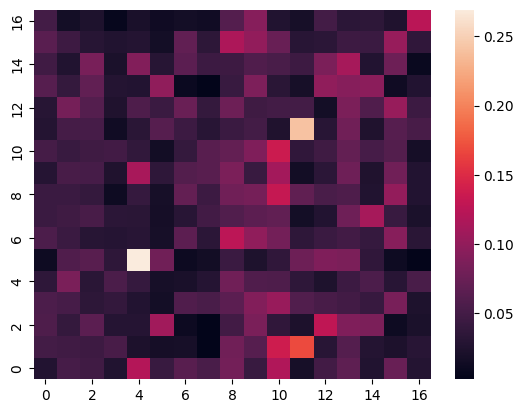

In [301]:
attention_matrix = attention_map(model, sample['plain'], heads, layers)
figure = sns.heatmap(attention_matrix, xticklabels=2, yticklabels=2)
figure.invert_yaxis()
plt.show()